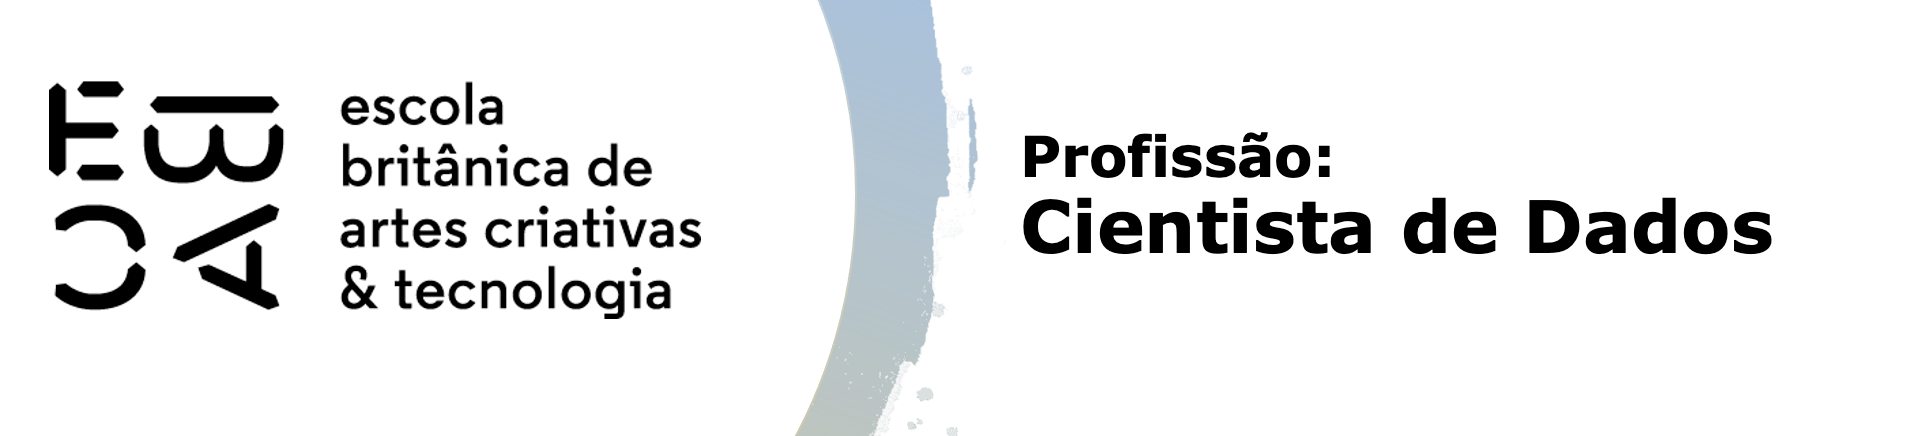

# Probabilidade - Tarefa

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from scipy.stats import norm, t

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

O peso segue uma distribuição normal, portanto:

$X \sim N(15, (0,1)^2)$

Em que:

$15 = \mu$ 

$(0,1)^2 = \sigma$

Queremos a probabilidade de um pacote selecionado ter mais que 15,2 kg, portanto:

$P(X > 15,2)$

A probabilidade é dada pela soma infinitesimal dos valores abaixo da curva $f(x)$ para valores maiores que 15,2. Mostrada pela fórmula:

$\int_{15,2}^{\infty} f(x)\ dx $

Para o cálculo será necessário transformar o valor 15,2 em uma escala Z que possui uma distribuição normal padrão. 

$Z \sim N(0,1)$

A fórmula é:

$Z = \frac{X - \mu}{\sigma}$

A ideia é saber quantos "Desvio padrão" o valor 15,2 está acima da média na escala Z:

$Z = \frac{15,2 - 15}{0,1} = \frac{0,2}{0,1} = 2$

Como o valores das probabilidades da escala Z são conhecidos, temos que a probabilidade de Z ser menor que 2 é:

$P(Z < 2) = 0,9772$

Como queremos a probabilidade de X basta utilizar a simetria:

$P(X > 15,2) = P(Z > 2)$

Como o que queremos é  $P(X > 15,2)$ e sabemos que é simetrica a $P(Z > 2)$, basta calcular $1 - P(Z > 2)$:

$P(Z > 2) = 1 - P(Z < 2) = 1 - 0,9772 = 0,0228$

Portanto:

$P(X > 15,2) = 0,228 = 2,28\% $

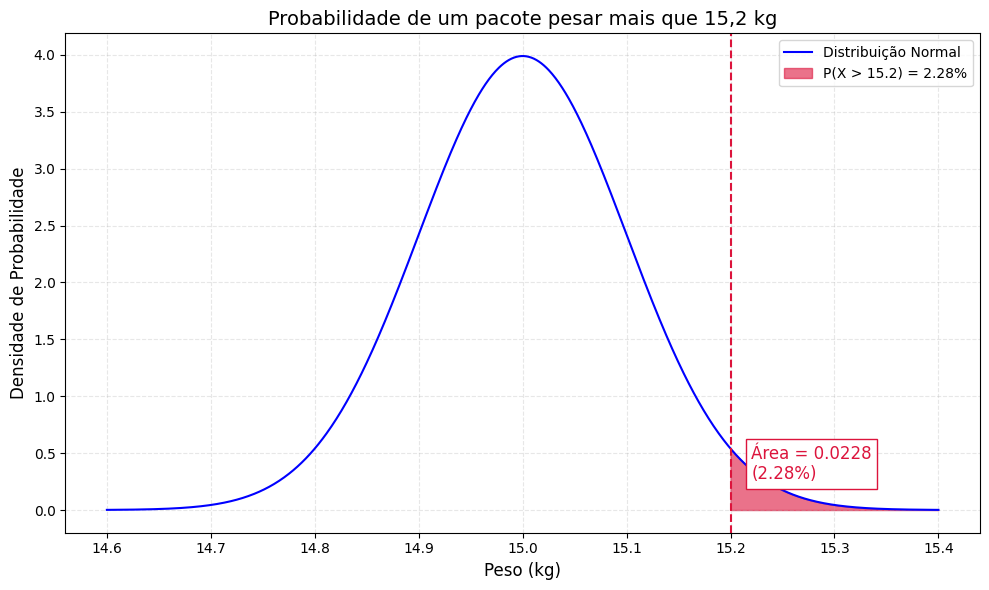

In [76]:
mu = 15       
sigma = 0.1
x = 15.2

prob = 1 - norm.cdf(x, loc=mu, scale=sigma)

x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_vals = norm.pdf(x_vals, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue', linewidth=1.5, label='Distribuição Normal')

x_fill = np.linspace(x, mu + 4*sigma, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='crimson', alpha=0.6, label=f'P(X > {x}) = {prob*100:.2f}%')

plt.axvline(x, color='crimson', linestyle='--', linewidth=1.5)

plt.text(x + 0.02, norm.pdf(x, mu, sigma)/2,
         f'Área = {prob:.4f}\n({prob*100:.2f}%)',
         fontsize=12, color='crimson', bbox=dict(facecolor='white', edgecolor='crimson'))

plt.title('Probabilidade de um pacote pesar mais que 15,2 kg', fontsize=14)
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

Queremos encontrar um valor p, tal que:

$P(X < p) = 0,95$

Transformando X na variável padronizada Z:

$Z = \frac{X - \mu}{\sigma} = \frac{X - 15}{0,1}$

Então a condição fica:

$P(Z < \frac{p - 15}{0,1}) = 0,95$

Como Z é padronizada sabemos que:

$P(Z < z) = 0,95 \Rightarrow z = 1,645$

Aplicando o resultado na variável original p:

$\frac{p - 15}{0,1} = 1,645 \Rightarrow p - 15 = 1,645 \ . \ 0,1$

Portanto:

$p = 15,1645 kg$

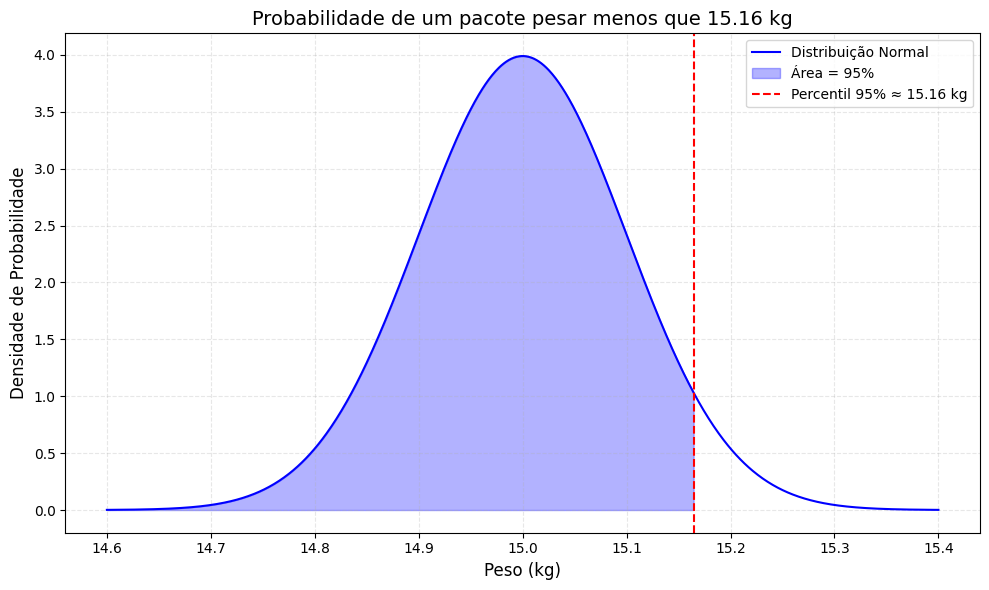

In [77]:
x_percentil_95 = norm.ppf(0.95, loc=mu, scale=sigma)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal', linewidth=1.5, color='blue')

x_fill = np.linspace(mu - 4*sigma, x_percentil_95, 1000)
y_fill = norm.pdf(x_fill, loc=mu, scale=sigma)
plt.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label='Área = 95%')

plt.axvline(x_percentil_95, color='red', linestyle='--', label=f'Percentil 95% ≈ {x_percentil_95:.2f} kg')

plt.title(f'Probabilidade de um pacote pesar menos que {x_percentil_95:.2f} kg', fontsize=14)
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [88]:
Y=np.linspace(-6, 6, 200)
# Seu código começa aqui

gl = 5

prob_Y1 = norm.cdf(Y)
prob_Y2 = t.cdf(Y, gl)

df_resultado = pd.DataFrame({
    'Valor (y)': Y,
    'Probabilidade_Y1': prob_Y1,
    'Probabilidade_Y2': prob_Y2
})

df_resultado

,Valor (y),Probabilidade_Y1,Probabilidade_Y2
0,-6.000000,9.865876e-10,0.000923
1,-5.939698,1.427734e-09,0.000966
2,-5.879397,2.058819e-09,0.001011
3,-5.819095,2.958347e-09,0.001058
4,-5.758794,4.235851e-09,0.001108
...,...,...,...
195,5.758794,1.000000e+00,0.998892
196,5.819095,1.000000e+00,0.998942
197,5.879397,1.000000e+00,0.998989
198,5.939698,1.000000e+00,0.999034


4. Faça uma visualização gráfica dos dados do item anterior.

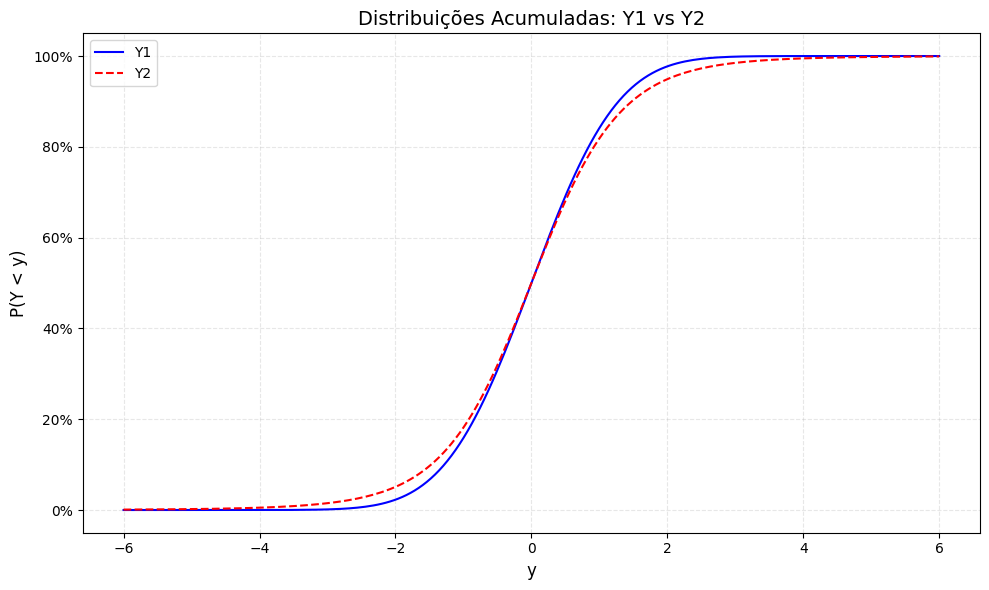

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Y, prob_Y1, label='Y1', color='blue', linewidth=1.5)
ax.plot(Y, prob_Y2, label='Y2', color='red', linestyle='--', linewidth=1.5)

plt.title('Distribuições Acumuladas: Y1 vs Y2', fontsize=14)
plt.xlabel('y', fontsize=12)
plt.ylabel('P(Y < y)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

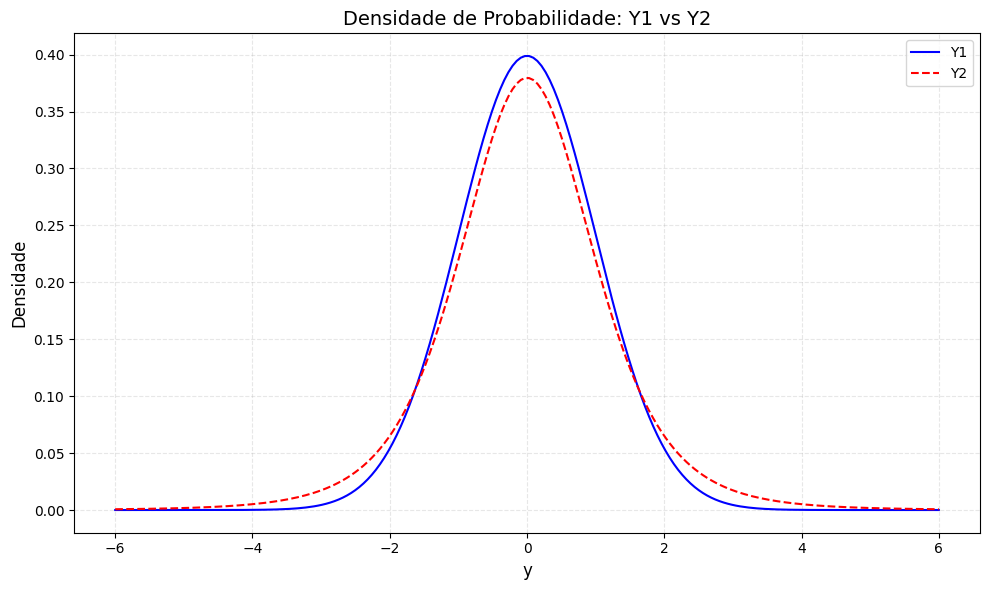

In [90]:
pdf_y1 = norm.pdf(Y)
pdf_y2 = t.pdf(Y, gl)

plt.figure(figsize=(10, 6))
plt.plot(Y, pdf_y1, label='Y1', color='blue', linewidth=1.5)
plt.plot(Y, pdf_y2, label='Y2', color='red', linestyle='--', linewidth=1.5)

plt.title('Densidade de Probabilidade: Y1 vs Y2', fontsize=14)
plt.xlabel('y', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [83]:
Y=np.linspace(0, 1, 200)
# Seu código começa aqui

gl = 5

percentis_Y1 = norm.ppf(Y)      
percentis_Y2 = t.ppf(Y, gl) 

df_percentis = pd.DataFrame({
    'Y': Y,
    'Percentil_Y1': percentis_Y1,
    'Percentil_Y2': percentis_Y2
})

df_percentis

,Y,Percentil_Y1,Percentil_Y2
0,0.000000,-inf,-inf
1,0.005025,-2.574096,-4.027071
2,0.010050,-2.324467,-3.360338
3,0.015075,-2.168104,-2.998512
4,0.020101,-2.051678,-2.752285
...,...,...,...
195,0.979899,2.051678,2.752285
196,0.984925,2.168104,2.998512
197,0.989950,2.324467,3.360338
198,0.994975,2.574096,4.027071


6. Faça um gráfico com os dados do item anterior.

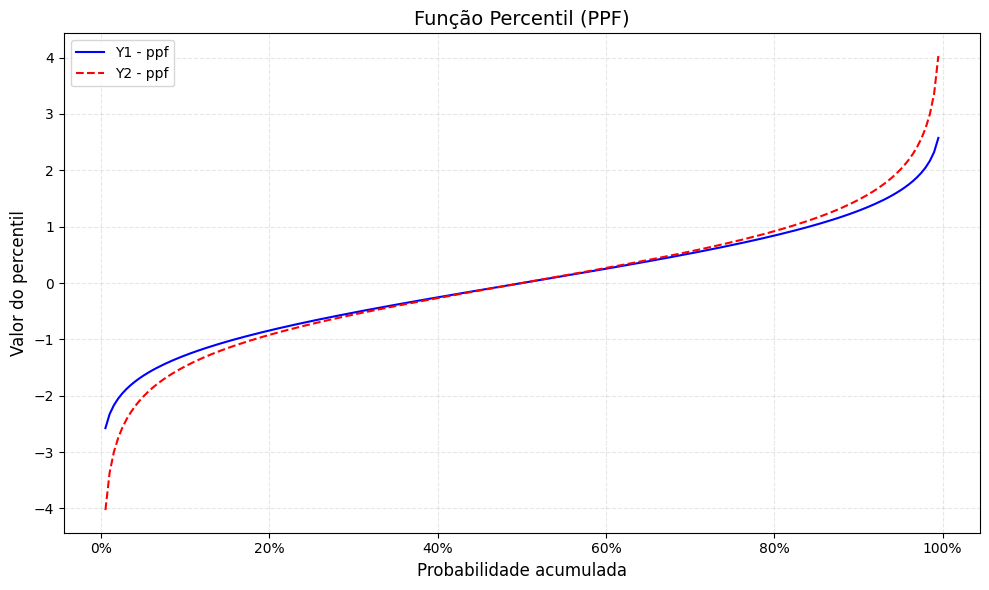

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Y, percentis_Y1, label='Y1 - ppf', color='blue', linewidth=1.5)
ax.plot(Y, percentis_Y2, label='Y2 - ppf', color='red', linestyle='--', linewidth=1.5)

plt.title('Função Percentil (PPF)', fontsize=14)
plt.xlabel('Probabilidade acumulada', fontsize=12)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Valor do percentil', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()